In [194]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy import stats
from scipy.stats import linregress
from config import weather_api_key
#from config import g_key
from citipy import citipy
import csv as atlantic_working


In [60]:
# Import API key
from config import weather_api_key

In [61]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [62]:
awdf = pd.read_csv('hurdatawdates.csv')

In [68]:
#awdf.dtypes

In [64]:
df1 = awdf.copy()
df1

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [10]:
#df1

In [11]:
# #set "city center" for Houston
# Houston_lat = 29.756097853207656
# Houston_lng = -95.3669907972107

# #calculate greater Houston area by expanding lat and lng
# lat = np.random.uniform(Houston_lat-1, Houston_lat+2, size=6500)
# lng = np.random.uniform(Houston_lng-5, Houston_lng+2, size=6500)

In [69]:
filtered_lat_lng = df1[(df1["Latitude"]<=29) & (df1["Latitude"]>=18) & (df1["Longitude"]>=-100) & (df1["Longitude"]<=-83)]
filtered_lat_lng

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [70]:
filt_df=filtered_lat_lng.rename(columns={"Minimum PreLow Intensity Subtropical Cycloneure":"Minimum Pressure"})

In [71]:
filt_df

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [72]:
filt_df2 = filt_df[(filt_df["Minimum Pressure"]>=0)]
filt_df2

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [73]:
def knots_to_mph(x):
     return x*1.15078

filt_df2["Max_Wind"]=filt_df2["Maximum Wind"].apply(knots_to_mph)

In [74]:
data_df = filt_df2.drop(columns="Maximum Wind")

In [76]:
data_df

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [77]:
#data_df.set_index(inplace = False)
data_df

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [92]:
low_wind = data_df.loc[(data_df["Low Wind NE"]>0)&(data_df["Low Wind SE"]>0)&(data_df["Low Wind SW"]>0)&(data_df["Low Wind NW"]>0),:]
low_wind["Low_wind_avg"] = (low_wind["Low Wind NE"]+low_wind["Low Wind SE"]+low_wind["Low Wind SW"]+low_wind["Low Wind NW"])/4
low_wind

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms,Low_wind_avg
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,40.2773,LS,TS,25.0
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,46.0312,LS,TS,25.0
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,51.7851,LS,TS,25.0
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,51.7851,LS,TS,25.0
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,0,0,0,0,57.5390,HU,LS,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,0,0,0,0,0,0,63.2929,HU,LS,45.0
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,0,40,0,0,0,0,63.2929,HU,LS,70.0
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,0,40,0,0,0,0,63.2929,HU,LS,80.0
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,0,40,0,0,0,0,63.2929,HU,LS,80.0


In [200]:
low_year_grp = low_wind.groupby(["Year","ID"]).mean()["Low_wind_avg"]
low_year_df = low_year_grp.to_frame()
low_year_df
low_year_df.sort_values(["Year","ID"],ascending=True)
low_year_df.reset_index(inplace=True)
low_year_df

,Year,ID,Low_wind_avg
0,2004,AL022004,31.442308
1,2004,AL062004,137.500000
2,2004,AL092004,164.230769
3,2005,AL022005,28.333333
4,2005,AL032005,68.750000
5,2005,AL042005,146.000000
6,2005,AL052005,93.750000
7,2005,AL072005,64.583333
8,2005,AL112005,26.250000
9,2005,AL122005,136.250000


<AxesSubplot:xlabel='Year,ID'>

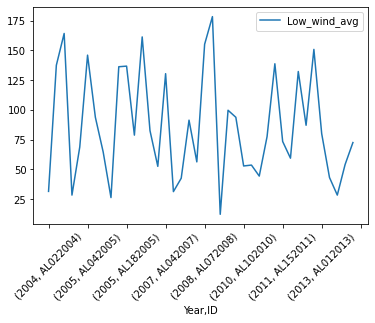

In [133]:
# x_axis = low_year_df["Year"]
# y_axis = low_year_df["Low_wind_avg"]
# # plt.figure(figsize=(30,6))



In [182]:
mode_wind = data_df[(data_df["Moderate Wind NE"]>0)&(data_df["Moderate Wind SE"]>0)&(data_df["Moderate Wind SW"]>0)&(data_df["Moderate Wind NW"]>0)]
mode_wind["Mode_wind_avg"] = (mode_wind["Moderate Wind NE"]+mode_wind["Moderate Wind SE"]+mode_wind["Moderate Wind SW"]+mode_wind["Moderate Wind NW"])/4

<ipython-input-182-f1b1e8201c8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mode_wind["Mode_wind_avg"] = (mode_wind["Moderate Wind NE"]+mode_wind["Moderate Wind SE"]+mode_wind["Moderate Wind SW"]+mode_wind["Moderate Wind NW"])/4


In [203]:
mode_year_grp = mode_wind.groupby(["Year","ID"]).mean()["Mode_wind_avg"]
mode_year_df = mode_year_grp.to_frame()
mode_year_df
mode_year_df.sort_values(["Year","ID"],ascending=True)
mode_year_df.reset_index(inplace=True)
mode_year_df

,Year,ID,Mode_wind_avg
0,2004,AL022004,15.000000
1,2004,AL092004,107.395833
2,2005,AL032005,26.250000
3,2005,AL042005,64.500000
4,2005,AL052005,55.480769
5,2005,AL122005,81.750000
6,2005,AL182005,83.437500
7,2005,AL202005,33.750000
8,2005,AL252005,94.705882
9,2007,AL042007,73.281250


In [213]:
#mode_year_df.plot.line(rot=45)

In [179]:
high_wind = data_df[(data_df["High Wind NE"]>0)&(data_df["High Wind SE"]>0)&(data_df["High Wind SW"]>0)&(data_df["High Wind NW"]>0)]
high_wind["High_wind_avg"] = (high_wind["High Wind NE"]+high_wind["High Wind SE"]+high_wind["High Wind SW"]+high_wind["High Wind NW"])/4

<ipython-input-179-90941bed4655>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_wind["High_wind_avg"] = (high_wind["High Wind NE"]+high_wind["High Wind SE"]+high_wind["High Wind SW"]+high_wind["High Wind NW"])/4


In [204]:
high_year_grp = high_wind.groupby(["Year","ID"]).mean()["High_wind_avg"]
high_year_df = high_year_grp.to_frame()
high_year_df
high_year_df.sort_values(["Year","ID"],ascending=True)
high_year_df.reset_index(inplace=True)
high_year_df

,Year,ID,High_wind_avg
0,2004,AL092004,76.250000
1,2005,AL042005,25.000000
2,2005,AL052005,34.531250
3,2005,AL122005,55.125000
4,2005,AL182005,53.125000
5,2005,AL202005,15.000000
6,2005,AL252005,64.926471
7,2007,AL042007,35.833333
8,2007,AL132007,15.000000
9,2008,AL042008,20.416667


In [181]:
# overlapping= 0.15
# #line1 = low_year_df.plot.line(rot=45,alpha=overlapping,c='b')
# #line2 = mode_year_df.plot.line(rot=45,alpha=overlapping,c='r')
# #line3 = high_year_df.plot.line(rot=45,alpha=overlapping,c='g')

# mode_year_df.plot(rot=45,c='r')
# low_year_df.plot(rot=45,c='b')
# high_year_df.plot(rot=45,c='g')


mode_year_df.plot.line(rot=45)
plt.show()

In [198]:
%matplotlib inline

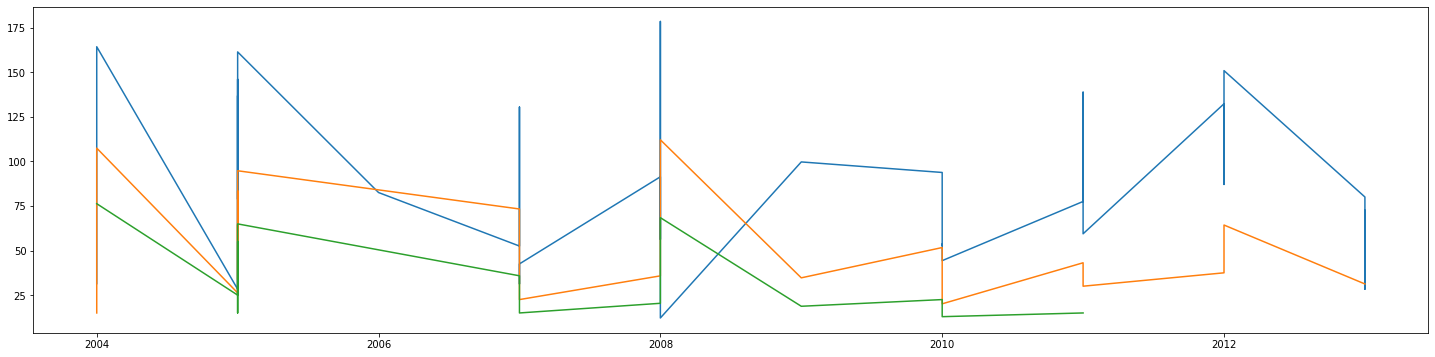

In [211]:
plt.figure(figsize=(25,6))
x_axis=low_year_df["Year"]
y_axis=low_year_df["Low_wind_avg"]
ax = plt.plot(x_axis,y_axis)

x1_axis=mode_year_df["Year"]
y1_axis=mode_year_df["Mode_wind_avg"]
plt.plot(x1_axis,y1_axis)

x2_axis=high_year_df["Year"]
y2_axis=high_year_df["High_wind_avg"]
plt.plot(x2_axis,y2_axis)

#plt.xticks(rotation=90)
# plt.title("Data Points per Drug Regimen -- pyplot")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Timepoints")
# plt.legend(["Drug Regimen"],loc="upper right")
#plt.tight_layout()